In [12]:
import numpy as np
#import scipy.misc

from skimage.transform import resize
from imageio import imread

from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import SGD

##model_architecture = "cifar10_architecture.json"
model_architecture = "model.json"
##model_weights = "cifar10_weights.h5"
model_weights = "model.h5"
model = model_from_json(open(model_architecture).read())
model.load_weights(model_weights)

img_names = ["cat-standing.jpg", "dog.jpg"]
#imgs = [np.transpose(resize(imread(img_name), (32, 32)), (2, 0, 1)).astype("float32") 
#    for img_name in img_names]
imgs = [resize(imread(img_name), (32, 32)).astype("float32") for img_name in img_names]
imgs = np.array(imgs) / 255
print("imgs.shape:", imgs.shape)

optim = SGD()
model.compile(loss="categorical_crossentropy", optimizer=optim, metrics=["accuracy"])

##predictions = model.predict_classes(imgs)
predictions = model.predict(imgs)
print("predictions:", predictions)

imgs.shape: (2, 32, 32, 3)
predictions: [[3.07233423e-01 1.10661378e-04 4.07383978e-01 2.14325488e-02
  2.63050273e-02 4.65598144e-03 1.93654317e-02 4.66107973e-04
  2.12759584e-01 2.87325907e-04]
 [3.07256192e-01 1.10775145e-04 4.07317072e-01 2.14465726e-02
  2.63093896e-02 4.65747295e-03 1.93571895e-02 4.66322032e-04
  2.12791577e-01 2.87559727e-04]]


/var/folders/p5/32mb12x959s4wk6tf8vcdx680000gn/T/ipykernel_4039/208701117.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imgs = [resize(imread(img_name), (32, 32)).astype("float32") for img_name in img_names]
2022-10-04 20:06:51.896055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


ValueError: x and y can be no greater than 2D, but have shapes (2,) and (2, 32, 32, 3)

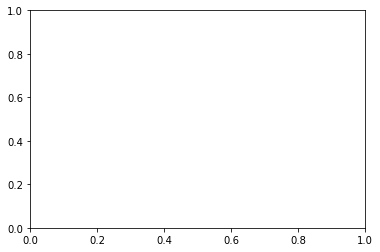